# ***SmartBridge Assignment 3(Data Science)

# Q1

In [1]:
# Download the dataset by clicking on the link

# Q2

In [2]:
# Load the Dataset

import pandas as pd
data = pd.read_csv('housing_DataSet.csv')

# Q3

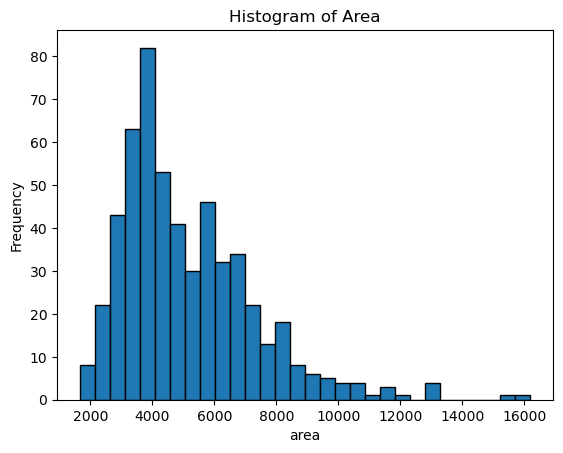

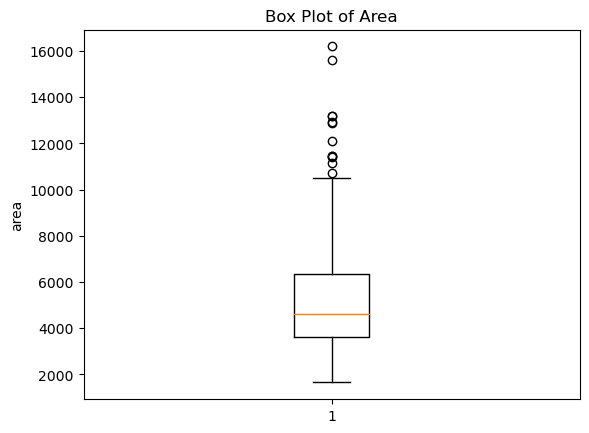

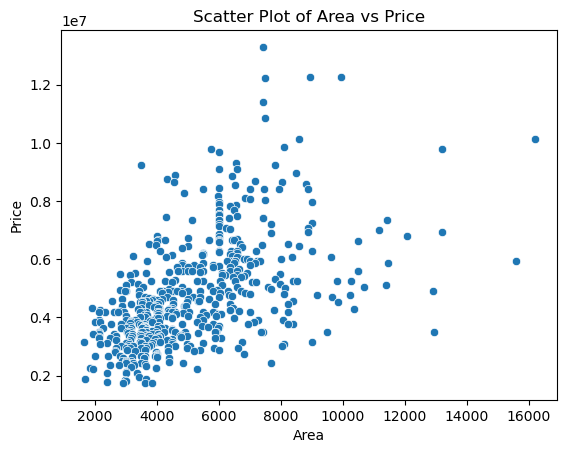

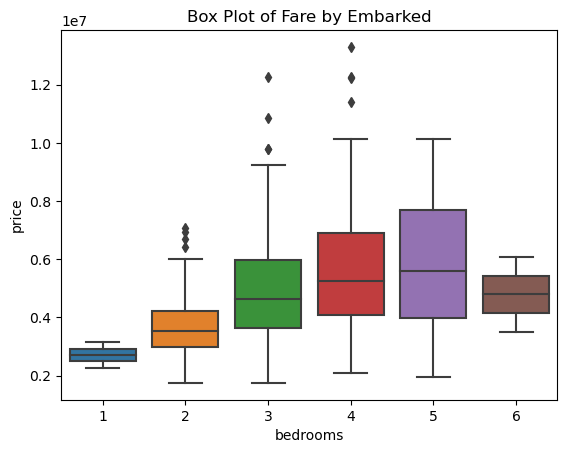

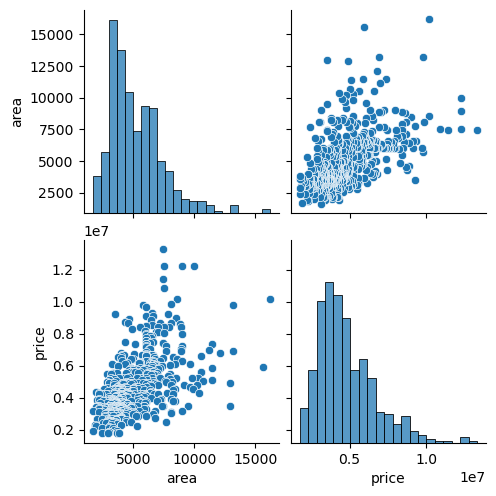

C:\Users\yashj\AppData\Local\Temp\ipykernel_4108\1090480842.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['area', 'price', 'furnishingstatus']].corr()


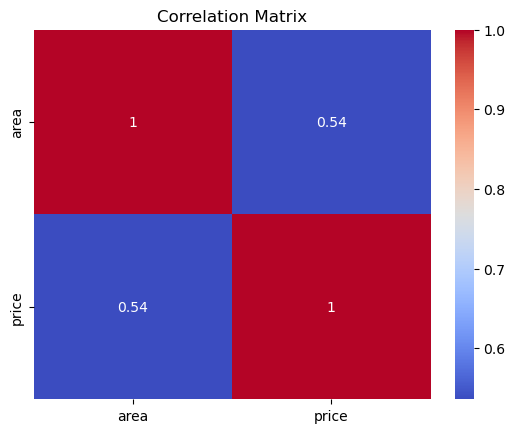

In [3]:
# Visualizations

# 1. Univariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('housing_DataSet.csv')

# Histogram
plt.hist(data['area'].dropna(), bins=30, edgecolor='black')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.show()

# Box Plot
plt.boxplot(data['area'].dropna())
plt.ylabel('area')
plt.title('Box Plot of Area')
plt.show()

# 2. Bi-variate Analysis

# Scatter Plot
sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs Price')
plt.show()

# Box Plot
sns.boxplot(x='bedrooms', y='price', data=data)
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Box Plot of Fare by Embarked')
plt.show()

# 3. Multi-variate Analysis

# Scatter Plot Matrix
sns.pairplot(data[['area', 'price', 'furnishingstatus']].dropna())
plt.show()

# Correlation Matrix
correlation_matrix = data[['area', 'price', 'furnishingstatus']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Q4

In [4]:
# Descriptive Statistics

descriptive_stats = data.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


# Q5

In [5]:
# Handling missing values

missing_values1 = data.isnull().sum()
print(missing_values1)

# No missing Values but if missing values were there then--->

mean_area = data['area'].mean()
data_filled = data.fillna({'area': mean_area})
data_filled = data.ffill()
data_new = data.dropna()

print("---------------------------------------------")

missing_values2 = data_new.isnull().sum()
print(missing_values2)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64
---------------------------------------------
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


# Q6

In [6]:
# Finding and replacing outliers

# Identifying Outliers for area
area_Q1 = data['area'].quantile(0.25)
area_Q3 = data['area'].quantile(0.75)
area_IQR = area_Q3 - area_Q1

area_lower_bound = area_Q1 - 1.5 * area_IQR
area_upper_bound = area_Q3 + 1.5 * area_IQR

outliers1 = data[(data['area'] < area_lower_bound) | (data['area'] > area_upper_bound)]

# Replacing Outliers for area
median_area = data['area'].median()
data.loc[(data['area'] < area_lower_bound) | (data['area'] > area_upper_bound), 'area'] = median_area

# Identifying Outliers for price
price_Q1 = data['price'].quantile(0.25)
price_Q3 = data['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1

price_lower_bound = price_Q1 - 1.5 * price_IQR
price_upper_bound = price_Q3 + 1.5 * price_IQR

outliers2 = data[(data['price'] < price_lower_bound) | (data['price'] > price_upper_bound)]

# Replacing Outliers for area
median_price = data['price'].median()
data.loc[(data['price'] < price_lower_bound) | (data['price'] > price_upper_bound), 'price'] = median_price

# Q7

In [7]:
# Checking for categorical columns and encoding

# Identifying Categorical Columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

# Encoding
encoded_data = pd.get_dummies(data, columns=categorical_cols)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


# Q8

In [34]:
# Checking for categorical columns and encoding

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical variables
categorical_vars = ['furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning'] 

# Convert categorical variables using one-hot encoding
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(), categorical_vars)],
    remainder='passthrough'
)
data_encoded = ct.fit_transform(data)

# Separate numerical variables from categorical variables
x = data_encoded[:, :-1]  # Numerical variables
y = data_encoded[:, -1]  # Categorical variables


# Q9

In [35]:
# Scale the independent variables

from sklearn.preprocessing import StandardScaler

# Scale independent variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


# Q10

In [37]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Q11

In [38]:
# Building the model
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()


# Q12

In [39]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

# Q13

In [40]:
# Testing the model
y_pred = model.predict(X_test)


# Q14

In [42]:
# Measuring performance
from sklearn.metrics import r2_score

r2_score=(y_pred,y_test)*100

In [43]:
r2_score

(array([ 0.55736185,  1.26048685,  0.51829935,  0.92454935,  0.66673685,
         0.9128306 ,  1.51829935,  0.70579935, -0.13013815,  0.40111185,
         1.18236185,  0.32298685,  0.3034556 ,  0.0768931 ,  0.15111185,
         0.0925181 ,  0.05736185,  1.02611185,  0.43236185,  0.67454935,
         0.59642435,  0.86986185,  0.22142435,  0.19798685,  1.04173685,
         1.23704935, -0.02076315,  0.44798685,  0.76829935,  0.33861185,
         0.85423685,  0.24486185,  1.00267435,  0.69017435,  0.4909556 ,
         0.79173685,  0.35423685,  0.32298685,  0.3659556 ,  0.53392435,
         1.20579935,  0.4831431 ,  1.25267435,  0.75267435,  0.79173685,
         0.8190806 ,  0.90111185,  0.77611185,  0.8347056 ,  0.05736185,
         1.14525247,  0.1940806 ,  1.18236185,  0.40892435,  0.26048685,
         0.29173685,  0.3815806 ,  0.03392435,  0.86204935,  0.33861185,
         0.45579935,  0.0768931 ,  0.99486185,  0.49486185,  0.6003306 ,
         0.84642435,  0.88548685,  0.29173685,  0.7